In [109]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [210]:
%run "featureSelection.ipynb"

----------------
               Columns        Score
31           sentiment  6773.682638
0   host_response_rate  6431.843258
29     amenities_count   263.548784
1    host_is_superhost   149.157935
26   reviews_per_month   120.950215
----------------
----------------
               Columns        Score
31           sentiment  5385.757684
0   host_response_rate  3450.414756
29     amenities_count   185.463246
1    host_is_superhost   119.675834
26   reviews_per_month    94.629085
----------------
----------------
               Columns        Score
0   host_response_rate  5711.801576
31           sentiment  4928.552034
29     amenities_count   258.664707
1    host_is_superhost   160.091961
26   reviews_per_month   157.658318
----------------
----------------
               Columns        Score
31           sentiment  4541.731696
0   host_response_rate  2455.297309
29     amenities_count   191.621710
----------------
----------------
                Columns        Score
31            sent

In [211]:
#Splitting the model into train, and test
from sklearn.model_selection import train_test_split
review_scores_rating_Xtrain, review_scores_rating_Xtest, review_scores_rating_ytrain, review_scores_rating_ytest = train_test_split(review_scores_rating_X,review_scores_rating_y)
review_scores_accuracy_Xtrain, review_scores_accuracy_Xtest, review_scores_accuracy_ytrain, review_scores_accuracy_ytest = train_test_split(review_scores_accuracy_X,review_scores_accuracy_y)
review_scores_cleanliness_Xtrain, review_scores_cleanliness_Xtest, review_scores_cleanliness_ytrain, review_scores_cleanliness_ytest = train_test_split(review_scores_cleanliness_X,review_scores_cleanliness_y)
review_scores_checkin_Xtrain, review_scores_checkin_Xtest, review_scores_checkin_ytrain, review_scores_checkin_ytest = train_test_split(review_scores_checkin_X,review_scores_checkin_y)
review_scores_communication_Xtrain, review_scores_communication_Xtest, review_scores_communication_ytrain, review_scores_communication_ytest = train_test_split(review_scores_communication_X,review_scores_communication_y)
review_scores_location_Xtrain, review_scores_location_Xtest, review_scores_location_ytrain, review_scores_location_ytest = train_test_split(review_scores_location_X,review_scores_location_y)
review_scores_value_Xtrain, review_scores_value_Xtest, review_scores_value_ytrain, review_scores_value_ytest = train_test_split(review_scores_value_X,review_scores_value_y)

In [14]:
def Lasso_KfoldValidation(review_score_X,review_score_y, poly, C_value_list = [0.01, 1, 10], k_split=5):
    #importing required libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error

    X_poly = PolynomialFeatures(poly).fit_transform(review_score_X)
    mean_error=[]
    std_error=[]
    c=C_value_list
    for Ci in c:
        model = Lasso(alpha=1/(2*Ci))
        temp=[]
        kf = KFold(n_splits=k_split)
        X_poly_pd = pd.DataFrame(X_poly)
        for train, test in kf.split(review_score_X):
            XtrPoly = X_poly_pd.iloc[train]
            XtePoly = X_poly_pd.iloc[test]
            model.fit(XtrPoly, review_score_y.iloc[train])
            ypred = model.predict(XtePoly)
            temp.append(mean_squared_error(review_score_y.iloc[test],ypred))
        mean_error.append(np.array(temp).mean())
        std_error.append(np.array(temp).std())
        
    #creating a dictionary of c values and their corresponding mean square error
    score = {}
    mean = mean_error.copy()
    for key in c:
        for value in mean:
            score[key] = value
            mean.remove(value)
            break
    print("-----------------")
    print(score)
    print("-----------------")

    #plotting error bar
    plt.errorbar(c,mean_error,yerr=std_error, label = "Mean Error")
    plt.xlabel('C', fontweight ='bold'); plt.ylabel('Mean Square Error', fontweight ='bold')
    plt.title(f"Prediction Error (Lasso model) vs C")
    plt.legend()
    plt.xscale('log')
    plt.show()

In [16]:
c=[0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000]

c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.695e+00, tolerance: 3.572e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.392e+02, tolerance: 3.351e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

-----------------
{0.0001: 0.33566810269908515, 0.001: 0.33615960682143164, 0.01: 0.2860696204374288, 1: 0.24847912234482203, 10: 0.1451764917535004, 100: 0.45639767193194913, 1000: 0.5519270587320675, 10000: 0.5937244378041443}
-----------------


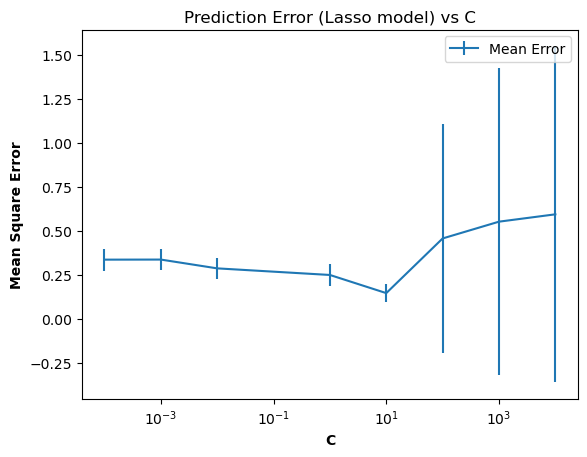

In [10]:
#Lasso_KfoldValidation(review_score_X,review_score_y, poly, C_value_list = [0.01, 1, 10], k_split=5)
Lasso_KfoldValidation(review_scores_rating_X,review_scores_rating_y, 3, c, 5)

c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.026e+02, tolerance: 1.879e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.571e+02, tolerance: 1.729e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

-----------------
{0.0001: 0.23855736566962205, 0.001: 0.23833365361024877, 0.01: 0.20858733830039897, 1: 0.18140893463495128, 10: 0.13420543668715296, 100: 0.1661241593312174, 1000: 0.20640571840908734, 10000: 0.2269360666244109}
-----------------


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.237e+02, tolerance: 2.019e-01
  model = cd_fast.enet_coordinate_descent(


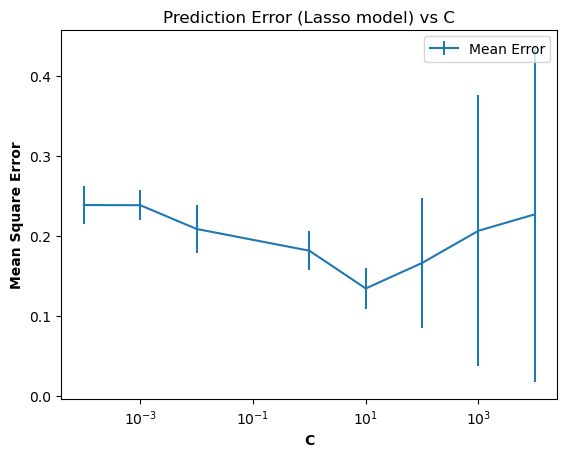

In [57]:
#Lasso_KfoldValidation(review_score_X,review_score_y, poly, C_value_list = [0.01, 1, 10], k_split=5)
Lasso_KfoldValidation(review_scores_accuracy_X,review_scores_accuracy_y, 3, c, 5)

c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.528e+00, tolerance: 3.987e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+02, tolerance: 3.673e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

-----------------
{0.0001: 0.3852317010849452, 0.001: 0.38572608498336713, 0.01: 0.3464292097334475, 1: 0.30389179174180037, 10: 0.21551768884404882, 100: 0.3396716806716382, 1000: 0.3441108442171227, 10000: 0.36917969167393155}
-----------------


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.739e+02, tolerance: 3.987e-01
  model = cd_fast.enet_coordinate_descent(


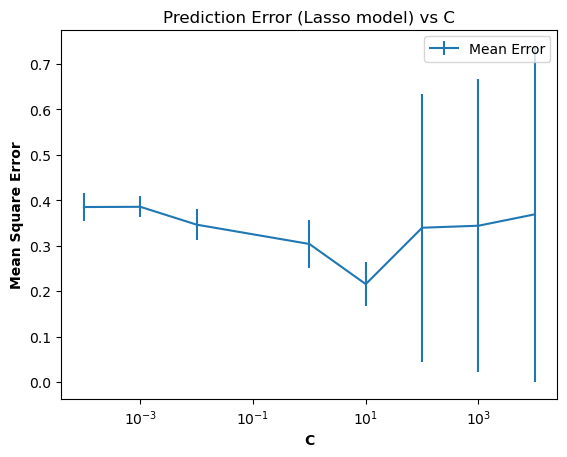

In [62]:
#Lasso_KfoldValidation(review_score_X,review_score_y, poly, C_value_list = [0.01, 1, 10], k_split=5)
Lasso_KfoldValidation(review_scores_cleanliness_X,review_scores_cleanliness_y, 3, c, 5)

c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.437e+02, tolerance: 1.243e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.636e+02, tolerance: 1.166e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

-----------------
{0.0001: 0.16817045839164993, 0.001: 0.167923527158269, 0.01: 0.14813751198190173, 1: 0.1344003134012759, 10: 0.11033841145294994, 100: 0.10442521091660269, 1000: 0.1010525644494058, 10000: 0.10120529331095125}
-----------------


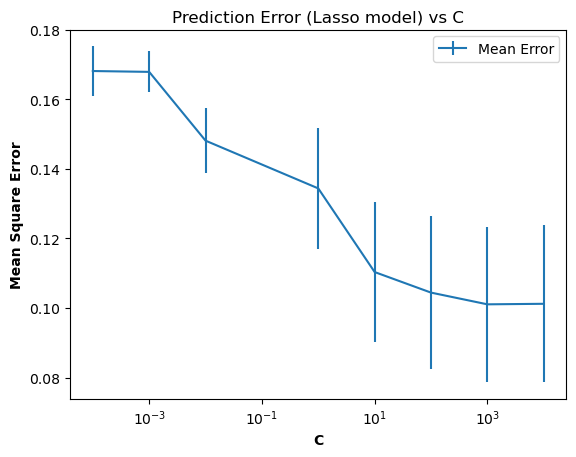

In [35]:
#Lasso_KfoldValidation(review_score_X,review_score_y, poly, C_value_list = [0.01, 1, 10], k_split=5)
Lasso_KfoldValidation(review_scores_checkin_X,review_scores_checkin_y, 3, c, 5)

c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.474e-01, tolerance: 1.238e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.841e-01, tolerance: 1.113e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

-----------------
{0.0001: 0.19736342538046098, 0.001: 0.3017013487373118, 0.01: 0.6292383809279624, 1: 0.35195795525675455, 10: 0.30336854741192665, 100: 0.17186789251593654, 1000: 0.7019511154959829, 10000: 0.5522686041516809}
-----------------


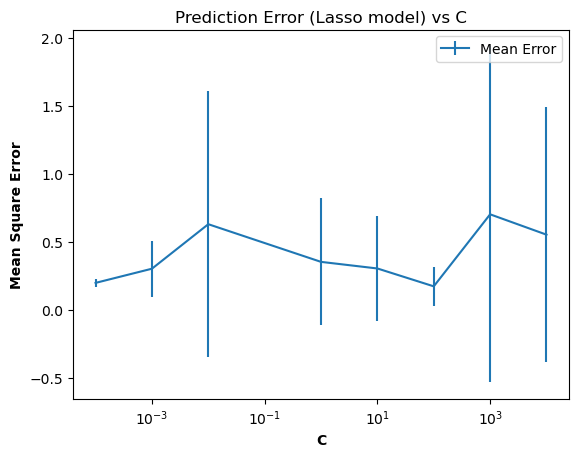

In [74]:
#Lasso_KfoldValidation(review_score_X,review_score_y, poly, C_value_list = [0.01, 1, 10], k_split=5)
Lasso_KfoldValidation(review_scores_communication_X,review_scores_communication_y, 2, c, 5)

c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.045e+02, tolerance: 1.011e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.075e+02, tolerance: 9.034e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

-----------------
{0.0001: 0.13810415267399442, 0.001: 0.1376873937053526, 0.01: 0.12521109736878674, 1: 0.11597601761935902, 10: 0.10664796947404873, 100: 0.10397533984949456, 1000: 0.11881373762043401, 10000: 0.13675934266201611}
-----------------


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.519e+02, tolerance: 9.823e-02
  model = cd_fast.enet_coordinate_descent(


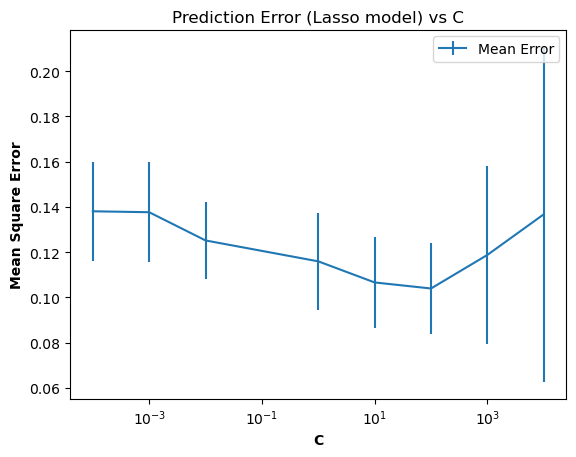

In [163]:
#Lasso_KfoldValidation(review_score_X,review_score_y, poly, C_value_list = [0.01, 1, 10], k_split=5)
Lasso_KfoldValidation(review_scores_location_X,review_scores_location_y, 3, c, 5)

c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.616e+02, tolerance: 2.479e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.503e+02, tolerance: 2.185e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

-----------------
{0.0001: 0.2235011573665499, 0.001: 0.22126265066077896, 0.01: 0.2107510006645541, 1: 0.18040439338669498, 10: 0.16018359104732988, 100: 0.15188128202378387, 1000: 0.14253571425126202, 10000: 0.14297034863840855}
-----------------


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.470e+02, tolerance: 2.595e-01
  model = cd_fast.enet_coordinate_descent(


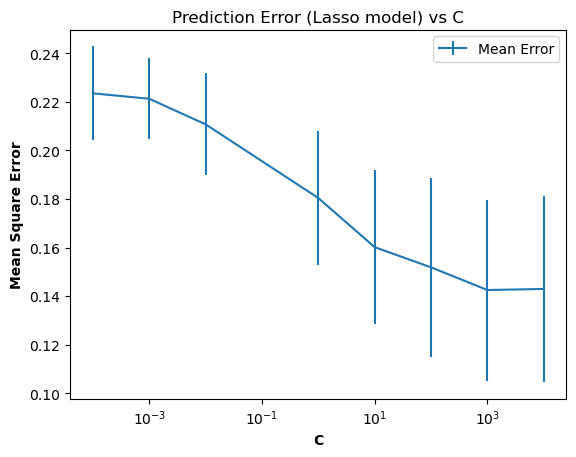

In [245]:
#Lasso_KfoldValidation(review_score_X,review_score_y, poly, C_value_list = [0.01, 1, 10], k_split=5)
Lasso_KfoldValidation(review_scores_value_X,review_scores_value_y, 5, c, 5)

In [46]:
from sklearn.preprocessing import PolynomialFeatures
review_scores_rating_Xtrain_poly = PolynomialFeatures(3).fit_transform(review_scores_rating_Xtrain)
review_scores_rating_Xtest_poly = PolynomialFeatures(3).fit_transform(review_scores_rating_Xtest)
review_scores_rating_X_poly = PolynomialFeatures(3).fit_transform(review_scores_rating_X)

review_scores_rating_model = Lasso(alpha = 1/(2*10)).fit(review_scores_rating_Xtrain_poly, review_scores_rating_ytrain)
review_scores_rating_model_pred = review_scores_rating_model.predict(review_scores_rating_Xtest_poly)
print('R2 accuracy score:',r2_score(review_scores_rating_ytest,review_scores_rating_model_pred))
print('MAE:',mean_absolute_error(review_scores_rating_ytest,review_scores_rating_model_pred))
print('MSE:',mean_squared_error(review_scores_rating_ytest,review_scores_rating_model_pred))
print('RMSE:',mean_squared_error(review_scores_rating_ytest,review_scores_rating_model_pred,squared=False))

R2 accuracy score: 0.7708931090673031
MAE: 0.18686054370792526
MSE: 0.11470719087341906
RMSE: 0.33868450049185755


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+02, tolerance: 3.110e-01
  model = cd_fast.enet_coordinate_descent(


In [56]:
from sklearn.preprocessing import PolynomialFeatures
review_scores_accuracy_Xtrain_poly = PolynomialFeatures(3).fit_transform(review_scores_accuracy_Xtrain)
review_scores_accuracy_Xtest_poly = PolynomialFeatures(3).fit_transform(review_scores_accuracy_Xtest)
review_scores_accuracy_X_poly = PolynomialFeatures(3).fit_transform(review_scores_accuracy_X)

review_scores_accuracy_model = Lasso(alpha = 1/(2*10)).fit(review_scores_accuracy_Xtrain_poly, review_scores_accuracy_ytrain)
review_scores_accuracy_model_pred = review_scores_accuracy_model.predict(review_scores_accuracy_Xtest_poly)
print('R2 accuracy score:',r2_score(review_scores_accuracy_ytest,review_scores_accuracy_model_pred))
print('MAE:',mean_absolute_error(review_scores_accuracy_ytest,review_scores_accuracy_model_pred))
print('MSE:',mean_squared_error(review_scores_accuracy_ytest,review_scores_accuracy_model_pred))
print('RMSE:',mean_squared_error(review_scores_accuracy_ytest,review_scores_accuracy_model_pred,squared=False))

R2 accuracy score: 0.5846044037244409
MAE: 0.19054000726002365
MSE: 0.12246144193288351
RMSE: 0.34994491271182027


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.003e+02, tolerance: 1.797e-01
  model = cd_fast.enet_coordinate_descent(


In [60]:
from sklearn.preprocessing import PolynomialFeatures
review_scores_cleanliness_Xtrain_poly = PolynomialFeatures(3).fit_transform(review_scores_cleanliness_Xtrain)
review_scores_cleanliness_Xtest_poly = PolynomialFeatures(3).fit_transform(review_scores_cleanliness_Xtest)
review_scores_cleanliness_X_poly = PolynomialFeatures(3).fit_transform(review_scores_cleanliness_X)

review_scores_cleanliness_model = Lasso(alpha = 1/(2*10)).fit(review_scores_cleanliness_Xtrain_poly, review_scores_cleanliness_ytrain)
review_scores_cleanliness_model_pred = review_scores_cleanliness_model.predict(review_scores_cleanliness_Xtest_poly)
print('R2 accuracy score:',r2_score(review_scores_cleanliness_ytest,review_scores_cleanliness_model_pred))
print('MAE:',mean_absolute_error(review_scores_cleanliness_ytest,review_scores_cleanliness_model_pred))
print('MSE:',mean_squared_error(review_scores_cleanliness_ytest,review_scores_cleanliness_model_pred))
print('RMSE:',mean_squared_error(review_scores_cleanliness_ytest,review_scores_cleanliness_model_pred,squared=False))

R2 accuracy score: 0.5693715875388986
MAE: 0.26740731640920506
MSE: 0.2360676261075714
RMSE: 0.48586791014386965


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.144e+02, tolerance: 3.518e-01
  model = cd_fast.enet_coordinate_descent(


In [37]:
from sklearn.preprocessing import PolynomialFeatures
review_scores_checkin_Xtrain_poly = PolynomialFeatures(3).fit_transform(review_scores_checkin_Xtrain)
review_scores_checkin_Xtest_poly = PolynomialFeatures(3).fit_transform(review_scores_checkin_Xtest)
# review_scores_checkin_X_poly = PolynomialFeatures(3).fit_transform(review_scores_checkin_X)

review_scores_checkin_model = Lasso(alpha = 1/(2*1000)).fit(review_scores_checkin_Xtrain_poly, review_scores_checkin_ytrain)
review_scores_checkin_model_pred = review_scores_checkin_model.predict(review_scores_checkin_Xtest_poly)
print('R2 accuracy score:',r2_score(review_scores_checkin_ytest,review_scores_checkin_model_pred))
print('MAE:',mean_absolute_error(review_scores_checkin_ytest,review_scores_checkin_model_pred))
print('MSE:',mean_squared_error(review_scores_checkin_ytest,review_scores_checkin_model_pred))
print('RMSE:',mean_squared_error(review_scores_checkin_ytest,review_scores_checkin_model_pred,squared=False))

R2 accuracy score: 0.5534342712357972
MAE: 0.1590645394462182
MSE: 0.10353068862912126
RMSE: 0.32176185079825925


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.798e+02, tolerance: 1.112e-01
  model = cd_fast.enet_coordinate_descent(


In [80]:
from sklearn.preprocessing import PolynomialFeatures
review_scores_communication_Xtrain_poly = PolynomialFeatures(2).fit_transform(review_scores_communication_Xtrain)
review_scores_communication_Xtest_poly = PolynomialFeatures(2).fit_transform(review_scores_communication_Xtest)
# review_scores_checkin_X_poly = PolynomialFeatures(3).fit_transform(review_scores_checkin_X)

review_scores_communication_model = Lasso(alpha = 1/(2*1000)).fit(review_scores_communication_Xtrain_poly, review_scores_communication_ytrain)
review_scores_communication_model_pred = review_scores_communication_model.predict(review_scores_communication_Xtest_poly)
print('R2 accuracy score:',r2_score(review_scores_communication_ytest,review_scores_communication_model_pred))
print('MAE:',mean_absolute_error(review_scores_communication_ytest,review_scores_communication_model_pred))
print('MSE:',mean_squared_error(review_scores_communication_ytest,review_scores_communication_model_pred))
print('RMSE:',mean_squared_error(review_scores_communication_ytest,review_scores_communication_model_pred,squared=False))


R2 accuracy score: 0.5626185108568149
MAE: 0.1476000349211009
MSE: 0.08418447104630664
RMSE: 0.29014560318279276


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+02, tolerance: 1.129e-01
  model = cd_fast.enet_coordinate_descent(


In [169]:
from sklearn.preprocessing import PolynomialFeatures
review_scores_location_Xtrain_poly = PolynomialFeatures(3).fit_transform(review_scores_location_Xtrain)
review_scores_location_Xtest_poly = PolynomialFeatures(3).fit_transform(review_scores_location_Xtest)
# review_scores_checkin_X_poly = PolynomialFeatures(3).fit_transform(review_scores_checkin_X)

review_scores_location_model = Lasso(alpha = 1/(2*10000)).fit(review_scores_location_Xtrain_poly, review_scores_location_ytrain)
review_scores_location_model_pred = review_scores_location_model.predict(review_scores_location_Xtest_poly)
print('R2 accuracy score:',r2_score(review_scores_location_ytest,review_scores_location_model_pred))
print('MAE:',mean_absolute_error(review_scores_location_ytest,review_scores_location_model_pred))
print('MSE:',mean_squared_error(review_scores_location_ytest,review_scores_location_model_pred))
print('RMSE:',mean_squared_error(review_scores_location_ytest,review_scores_location_model_pred,squared=False))


R2 accuracy score: 0.48109061370541406
MAE: 0.1849351089995459
MSE: 0.08586216688089637
RMSE: 0.29302246821855893


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.672e+02, tolerance: 9.122e-02
  model = cd_fast.enet_coordinate_descent(


In [244]:
from sklearn.preprocessing import PolynomialFeatures
review_scores_value_Xtrain_poly = PolynomialFeatures(5).fit_transform(review_scores_value_Xtrain)
review_scores_value_Xtest_poly = PolynomialFeatures(5).fit_transform(review_scores_value_Xtest)
# review_scores_checkin_X_poly = PolynomialFeatures(3).fit_transform(review_scores_checkin_X)

review_scores_value_model = Lasso(alpha = 1/(2*1000)).fit(review_scores_value_Xtrain_poly, review_scores_value_ytrain)
review_scores_value_model_pred = review_scores_value_model.predict(review_scores_value_Xtest_poly)
print('R2 accuracy score:',r2_score(review_scores_value_ytest,review_scores_value_model_pred))
print('MAE:',mean_absolute_error(review_scores_value_ytest,review_scores_value_model_pred))
print('MSE:',mean_squared_error(review_scores_value_ytest,review_scores_value_model_pred))
print('RMSE:',mean_squared_error(review_scores_value_ytest,review_scores_value_model_pred,squared=False))


R2 accuracy score: 0.6402200306672285
MAE: 0.22504595707055228
MSE: 0.14101151340693488
RMSE: 0.3755149975792377


c:\Users\sarathkumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.753e+02, tolerance: 2.280e-01
  model = cd_fast.enet_coordinate_descent(
